In [3]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import pandas as pd # for data manipulation
import numpy as np # for data statistical analysis
import matplotlib.pyplot as plt # for data visualization
import random


In [4]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [7]:
# cheking shapes
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)

Shape of X_train (34799, 32, 32, 3)
Shape of y_train (34799,)


31

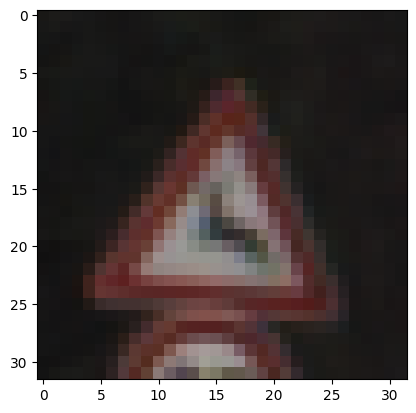

In [8]:
i = random.randint(1,1000)
plt.imshow(X_train[i])
y_train[i]


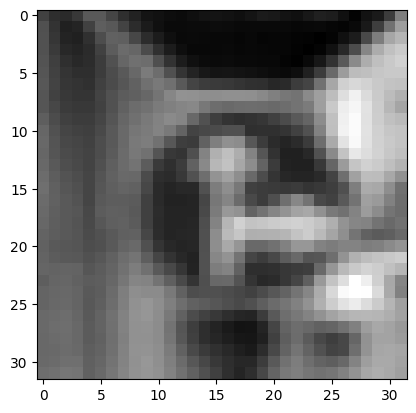

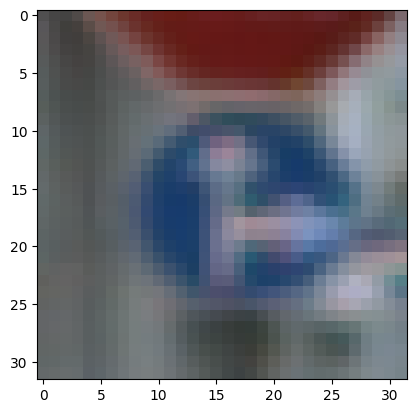

In [9]:
# shuffling the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

# convert into grayscale and normalization

X_train_gray = np.sum(X_train/3,axis=3,keepdims=True)
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True)
X_validation_gray=np.sum(X_validation/3,axis=3,keepdims=True)

X_train_norm = (X_train_gray-128)/128
X_test_norm = (X_test_gray-128)/128
X_validation_norm = (X_validation_gray-128)/128

# checking a result

i = 610
plt.imshow(X_train_gray[i].squeeze(),cmap="gray")
plt.figure()
plt.imshow(X_train[i])


In [10]:
# Model Training

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from subprocess import check_output
from sklearn.model_selection import train_test_split


In [11]:
# Model building

image_shape = X_train_gray[i].shape

cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(32,3,3,input_shape=image_shape,activation="relu"))
cnn_model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(128,activation="relu"))
cnn_model.add(tf.keras.layers.Dropout(0.5))
cnn_model.add(tf.keras.layers.Dense(43,activation="sigmoid"))


In [13]:
# Compile and train the model
cnn_model.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.Adam(0.001,beta_1=0.9,beta_2=0.99,epsilon=1e-07,amsgrad=False),metrics=["accuracy"])

history= cnn_model.fit(X_train_norm,y_train,batch_size=32,epochs=60,verbose=1,validation_data=(X_validation_norm,y_validation))


Epoch 1/60
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.2787 - loss: 2.7100 - val_accuracy: 0.8061 - val_loss: 0.7606
Epoch 2/60
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7573 - loss: 0.8073 - val_accuracy: 0.8746 - val_loss: 0.4389
Epoch 3/60
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.8564 - loss: 0.4742 - val_accuracy: 0.8882 - val_loss: 0.3809
Epoch 4/60
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.8872 - loss: 0.3695 - val_accuracy: 0.9120 - val_loss: 0.3089
Epoch 5/60
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9129 - loss: 0.2885 - val_accuracy: 0.9152 - val_loss: 0.2590
Epoch 6/60
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9230 - loss: 0.2440 - val_accuracy: 0.9293 - val_loss: 0.2506
Epoch 7/60
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9343 - loss: 0.2123 - val_accuracy: 0.9447 - val_loss: 0.1951
Epoch 8/60
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9420 -

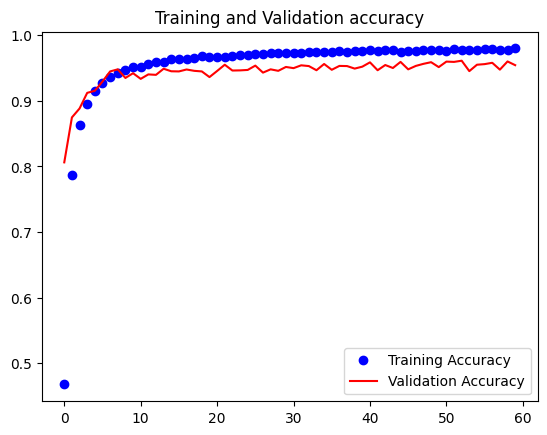

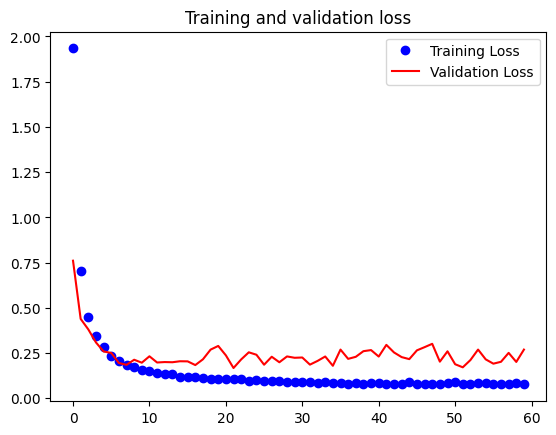

In [17]:
# Model Accuracy
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

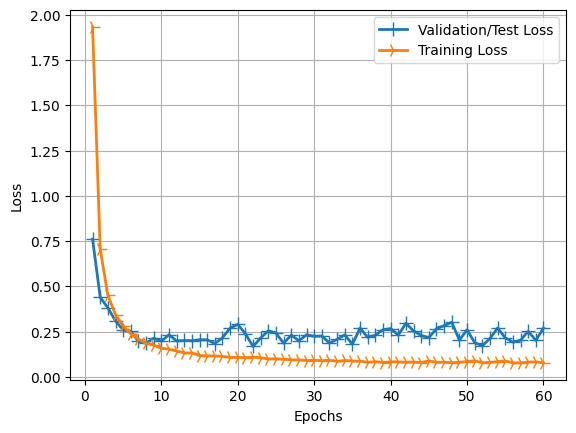

In [19]:

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

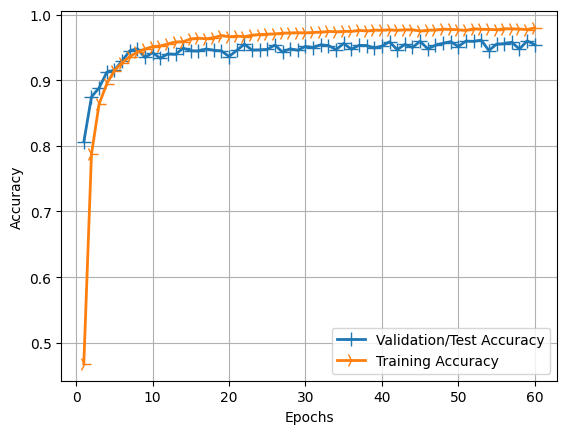

In [21]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


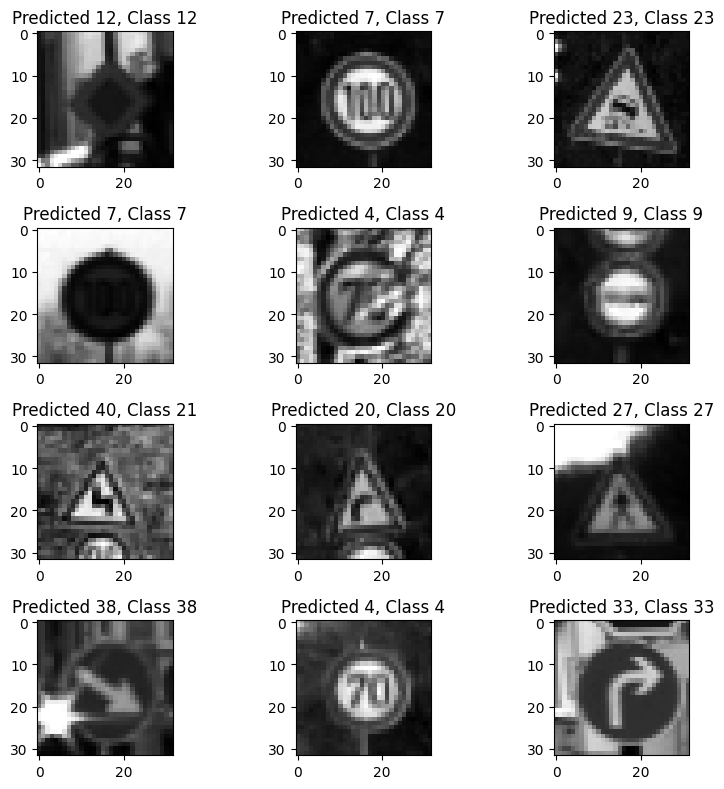

In [37]:
# saving and using model
import numpy as np


predicted_probabilities = cnn_model.predict(X_test_norm)

predicted_classes = np.argmax(predicted_probabilities, axis=1)
y_true = y_test
cnn_model.save("trafficSign.h5")

from keras.models import load_model
model=load_model("./trafficSign.h5")

plt.figure(figsize=(10, 8)) 
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()



In [40]:
#Printing the classification report
from sklearn.metrics import classification_report
predictions = predicted_classes
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        60
           1       0.87      0.99      0.92       720
           2       0.95      0.99      0.97       750
           3       0.94      0.90      0.92       450
           4       0.99      0.92      0.95       660
           5       0.91      0.90      0.90       630
           6       0.98      0.85      0.91       150
           7       0.94      0.94      0.94       450
           8       0.97      0.94      0.95       450
           9       0.95      1.00      0.97       480
          10       0.99      0.99      0.99       660
          11       0.91      1.00      0.95       420
          12       0.94      0.99      0.96       690
          13       0.99      0.99      0.99       720
          14       1.00      0.96      0.98       270
          15       0.98      1.00      0.99       210
          16       0.98      0.99      0.99       150
          17       1.00    

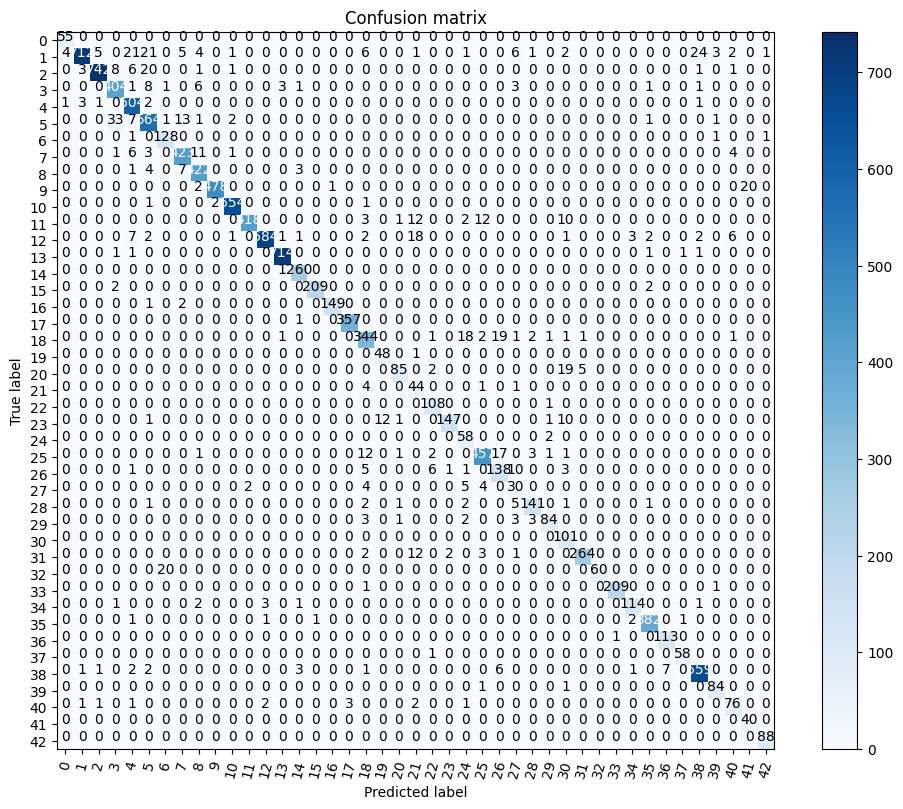

In [42]:
# Checking confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(43)
cm = confusion_matrix(predictions,y_test)

plt.figure(figsize=(10, 8)) 
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')